In [1]:
import pandas as pd
import seaborn as sns

In [2]:
Mydata2 = pd.read_excel("C:/Users/kaurb/Downloads/Accident_Dataset.xlsx")
Mydata2.to_csv ("Mydata2.csv", index = None,header=True)

In [49]:
df = pd.read_csv("Mydata2.csv")
df.head(n=10)

,ACCIDENT_NO,ACCIDENT_DATE,ACCIDENT_TIME,ALCOHOLTIME,ACCIDENT_TYPE,DAY_OF_WEEK,HIT_RUN_FLAG,LIGHT_CONDITION,POLICE_ATTEND,SEVERITY,...,OLD_DRIVER,YOUNG_DRIVER,ALCOHOL_RELATED,UNLICENCSED,NO_OF_VEHICLES,HEAVYVEHICLE,PASSENGERVEHICLE,MOTORCYCLE,PUBLICVEHICLE,STAT_DIV_NAME
0,T20170011699,2017-03-27 00:00:00,14.20.00,1,1,6.0,0,1,1,1,...,0,1,0,0,2,0,2,0,0,1.0
1,T20170011706,2017-03-25 00:00:00,19.00.00,1,1,4.0,0,2,0,2,...,0,1,0,1,2,0,2,0,0,2.0
2,T20170011709,2017-03-27 00:00:00,15.00.00,1,2,6.0,0,1,0,1,...,0,0,0,0,2,0,1,0,0,2.0
3,T20170011710,2017-03-27 00:00:00,16.10.00,1,1,6.0,0,1,1,1,...,0,0,0,0,2,0,1,1,0,2.0
4,T20170011711,2017-03-19 00:00:00,11.00.00,0,3,5.0,0,1,0,1,...,0,0,0,0,1,0,0,1,0,1.0
5,T20170011713,2017-03-27 00:00:00,17.05.00,1,1,6.0,0,1,1,1,...,0,0,0,0,2,0,1,0,0,2.0
6,T20170011727,2017-02-27 00:00:00,10.20.00,0,4,6.0,0,1,0,2,...,0,0,0,0,1,0,0,1,0,1.0
7,T20170011730,2017-03-27 00:00:00,18.00.00,1,1,6.0,0,2,1,2,...,0,0,0,0,2,0,2,0,0,2.0
8,T20170011739,2017-03-27 00:00:00,19.15.00,1,1,6.0,0,2,1,1,...,0,0,0,0,2,0,2,0,0,2.0
9,T20170011740,2017-03-27 00:00:00,16.35.00,1,1,6.0,0,1,1,2,...,0,0,1,0,2,0,2,0,0,2.0


In [50]:
X = df.iloc[:,3:].values

In [51]:
X_n = df[['LGA_NAME','TOTAL_PERSONS']]
X_n = X_n.iloc[:,:].values

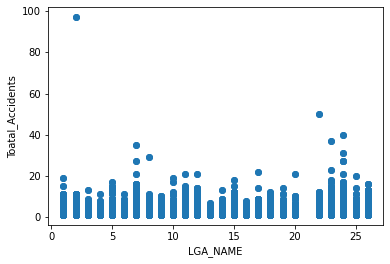

In [52]:
import matplotlib.pyplot as plt
plt.scatter(X_n[:,0],X_n[:,1])
plt.xlabel('LGA_NAME')
plt.ylabel('Toatal_Accidents')
plt.show()

In [53]:
time = df['ACCIDENT_TIME']
j=0
t=[]
for i in time:
   t.append(int(i[0:2])) 
   j+=1

import math
j=0
for i in t:
    t[j] = i//3
    j+=1
    
deathpertime={}
for i,j in zip(X_n[:,1],t):
    if j in deathpertime:
        deathpertime[j] += i
    else:
        deathpertime[j] = i

In [54]:
val=[]
for i in sorted(deathpertime):
    val.append(deathpertime[i])
    
label = ['12am-3am','3am-6am','6am-9am','9am-12pm','12pm-3pm','3pm-6pm','6pm-9pm','9pm-12am']

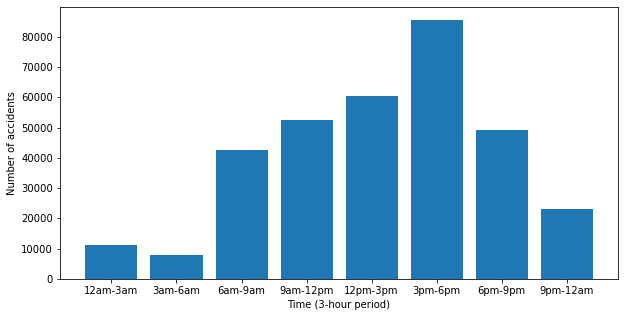

In [55]:
plt.figure(figsize=(10,5))
plt.bar([0,1,2,3,4,5,6,7],val) 
plt.xticks([0,1,2,3,4,5,6,7],label)
plt.xlabel('Time (3-hour period)')
plt.ylabel('Number of accidents')
plt.show()

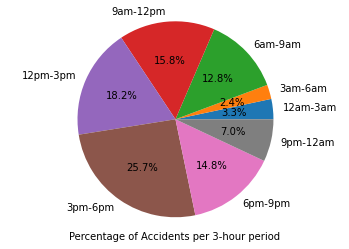

In [56]:
plt.pie(val,labels=label,autopct='%1.1f%%')
plt.axis('equal')
plt.xlabel('Percentage of Accidents per 3-hour period')
plt.show()

In [59]:
import numpy as np
X1 = df.iloc[:,:].values
X1 = np.delete(X1,2,axis=1)
X1 = np.delete(X1,1,axis=1)
X1 = np.delete(X1,0,axis=1)
names = (df.columns.values)
names = names[3:]

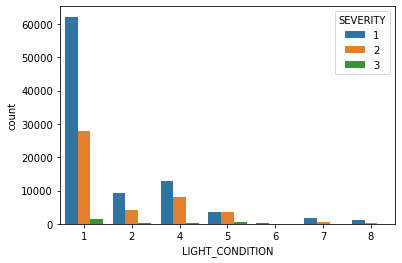

In [61]:
sns.countplot(x='LIGHT_CONDITION', hue='SEVERITY',data=df)
plt.show()

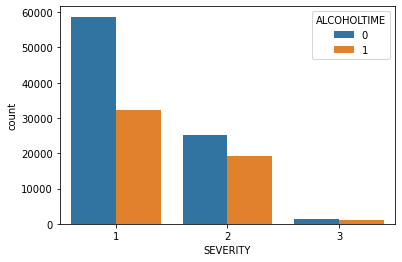

In [62]:
sns.countplot(x='SEVERITY',hue='ALCOHOLTIME',data=df)
plt.show()

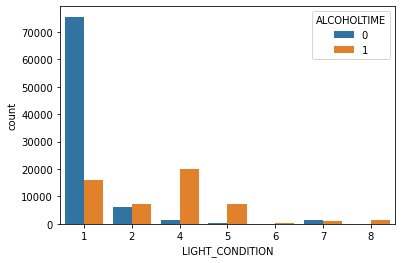

In [63]:
sns.countplot(x='LIGHT_CONDITION',hue='ALCOHOLTIME',data=df)
plt.show()

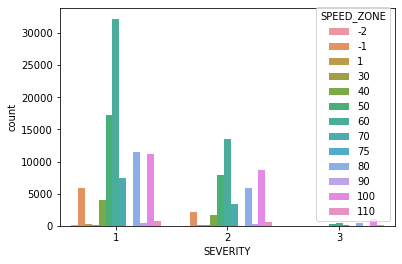

In [64]:
sns.countplot(x='SEVERITY',hue='SPEED_ZONE',data=df)
plt.show()

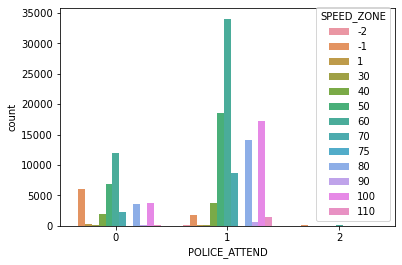

In [65]:
sns.countplot(x='POLICE_ATTEND',hue='SPEED_ZONE',data=df)
plt.show()

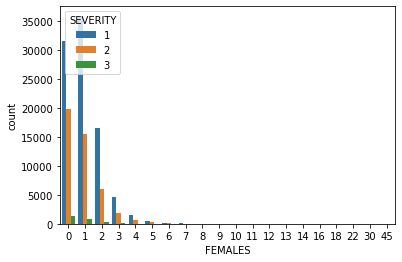

In [66]:
sns.countplot(x='FEMALES',hue='SEVERITY',data=df)
plt.show()